# EDA 

In [1]:
import numpy as np 
import pandas as pd 
import datetime 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df_train = pd.read_csv("Reduced_train.csv")
df_test = pd.read_csv("Reduced_test.csv")

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (406,409,410,417,421,422,423,424,425,427,428,429,430,431,432,433,434) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (405,408,409,416,420,421,422,423,424,426,427,428,429,430,431,432,433) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df_train.head()

,Unnamed: 0,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


### Some useful functions 

In [4]:
# This function returns the count of each values in the columns and Fraud % in each values. 

def count_and_perc_fraud_plot(df,col,size,title = ""):
    total = df_train.shape[0]
    perc_df = pd.crosstab(df_train[col],df_train["isFraud"],normalize = "index")*100
    perc_df =  perc_df.reset_index()
    perc_df.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    
    plt.figure(figsize= size)    
    plt.suptitle(f'{col} Distributions ', fontsize=24)
    
    plt.subplot(211)
    c1= sns.countplot( x=col,  data=df, order=list(perc_df[col].values))
    p1= c1.twinx()
    p1 = sns.pointplot(x=col, y='Fraud', data=perc_df, order=list(perc_df[col].values),
                       color='black', legend=False, )
    
    
    p1.set_ylim(0,perc_df['Fraud'].max()*1.1)
    p1.set_ylabel("%Fraud Transactions", fontsize=16)
    c1.set_title(f"Most Frequent {col} values and % Fraud Transactions" + title, fontsize=20)
    c1.set_xlabel(f"{col} Category Names", fontsize=16)
    c1.set_ylabel("Count", fontsize=17)
    c1.set_xticklabels(c1.get_xticklabels(),rotation=45)
    sizes = []
    for p in c1.patches:
        height = p.get_height()
        sizes.append(height)
        c1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center",fontsize=12)
        
    c1.set_ylim(0,max(sizes)*1.15)
    plt.show()


In [5]:
# Distribution plots 
def distribution_plot(df,col,size = (5,5),title = ""):
    plt.figure(figsize= size)
    sns.distplot(df[col][df["isFraud"] == 1].dropna(),label="Fruad")
    sns.distplot(df[col][df["isFraud"] == 0].dropna(),label="NoFruad")
    plt.title(col + " Distribution")
    plt.legend()
    plt.show()

In [6]:
# columns names 
def columns_names(base_str,start_int,end_int):
    return [base_str + str(i) for i in range(start_int,end_int+1)]

# EDA 

In [7]:
columns = list(df_train.columns)

#### IsFraud

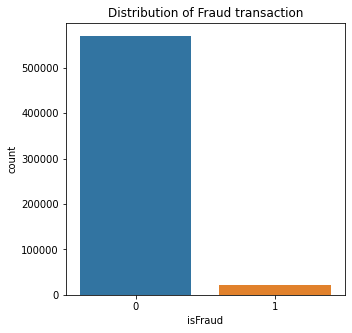

In [8]:
plt.figure(figsize=(5,5))
sns.countplot(x="isFraud",data = df_train)
plt.title("Distribution of Fraud transaction")
plt.show ()

This shows that the dataset is highly imbalanced dataset . Therefore we will deal this probem while making the model.

#### Transaction DT
<br> According to data description The TransactionDT feature is a timedelta from a given reference datetime (not an actual timestamp).
Since it is a timedelta ,exact date is note important </br> 

In [9]:
startdate = datetime.datetime.strptime('2019-12-01', '%Y-%m-%d')
df_train['trans_dt'] = df_train['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))
df_test['trans_dt'] = df_test['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))

In [10]:
# Let's check that if the fraud is committed in a particular hour,Day_of_week,Day_of_month.

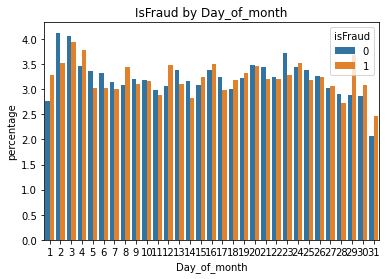

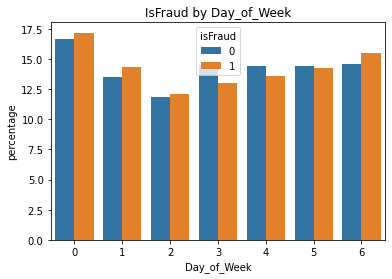

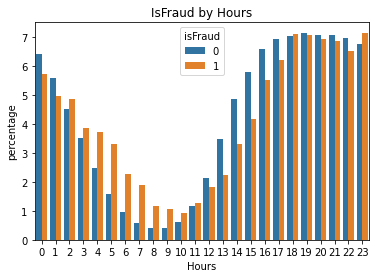

In [11]:
startdate = datetime.datetime.strptime('2019-12-01', '%Y-%m-%d')
df_train['trans_dt'] = df_train['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))
df_test['trans_dt'] = df_test['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))

df_train["Day_of_Week"]=df_train["trans_dt"].dt.dayofweek
df_train["Hours"]=df_train["trans_dt"].dt.hour
df_train["Day_of_month"]=df_train["trans_dt"].dt.day

df_test["Day_of_Week"]=df_test["trans_dt"].dt.dayofweek
df_test["Hours"]=df_test["trans_dt"].dt.hour
df_test["Day_of_month"]=df_test["trans_dt"].dt.day

for i in ["Day_of_month","Day_of_Week","Hours"]:
    plt.title("IsFraud by " + i)
    data = df_train.groupby(["isFraud"])[i].value_counts(normalize = True).mul(100).rename("percentage").reset_index().sort_values(i)
    sns.barplot(x = i , y = "percentage",hue= "isFraud",data = data)
    plt.show()

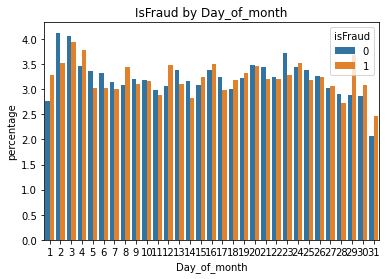

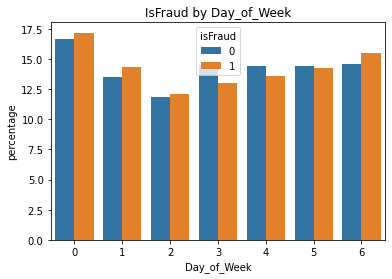

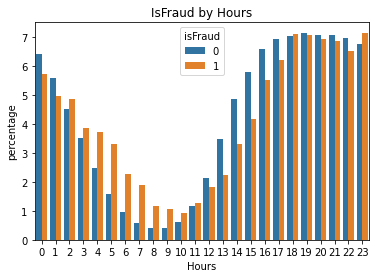

In [12]:
for i in ["Day_of_month","Day_of_Week","Hours"]:
    plt.title("IsFraud by " + i)
    data = df_train.groupby(["isFraud"])[i].value_counts(normalize = True).mul(100).rename("percentage").reset_index().sort_values(i)
    sns.barplot(x = i , y = "percentage",hue= "isFraud",data = data)
    plt.show()
    


Now we explore the variable TransactionAmt 

In [13]:
df_train["TransactionAmt"].describe(percentiles=[0.99,0.90,0.75,0.50,0.25,0.10]).apply(lambda x: format(x, 'f'))

count    590540.000000
mean        135.027682
std         239.158822
min           0.251000
10%          25.950000
25%          43.300000
50%          68.750000
75%         125.000000
90%         275.200000
99%        1104.000000
max       31940.000000
Name: TransactionAmt, dtype: object

There is a high variance in data . Lets see how the is tranaction amount distributed.We will consider 99% of values for plotting since there outliers in this column. 


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


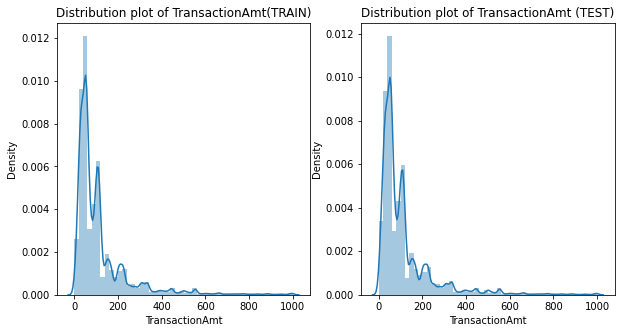

In [14]:

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Distribution plot of TransactionAmt(TRAIN)")
sns.distplot(df_train["TransactionAmt"][df_train["TransactionAmt"] <=1000])


plt.subplot(1,2,2)
plt.title("Distribution plot of TransactionAmt (TEST)")
sns.distplot(df_test["TransactionAmt"][df_test["TransactionAmt"] <=1000])
plt.show()



We see that "TransactionDT" resembles a log-normal distribution witha very high. Therefore to convert this distribution in to normal distribution we have to apply log transformation.

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


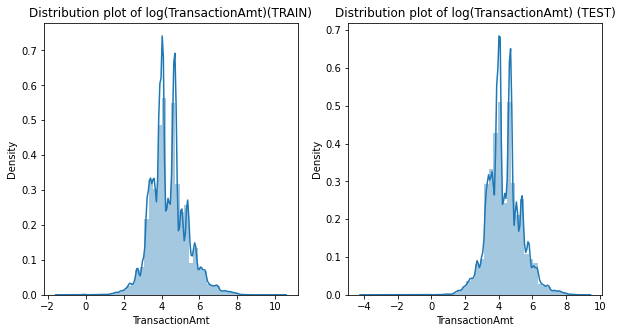

In [15]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Distribution plot of log(TransactionAmt)(TRAIN)")
sns.distplot(np.log(df_train["TransactionAmt"]))


plt.subplot(1,2,2)
plt.title("Distribution plot of log(TransactionAmt) (TEST)")
sns.distplot(np.log(df_test["TransactionAmt"]))
plt.show()

Now this resembles normal distribution. 

In [16]:
df_train["TransactionAmt_log"] = np.log(df_train["TransactionAmt"])
df_test["TransactionAmt_log"] = np.log(df_test["TransactionAmt"])

### Product CD

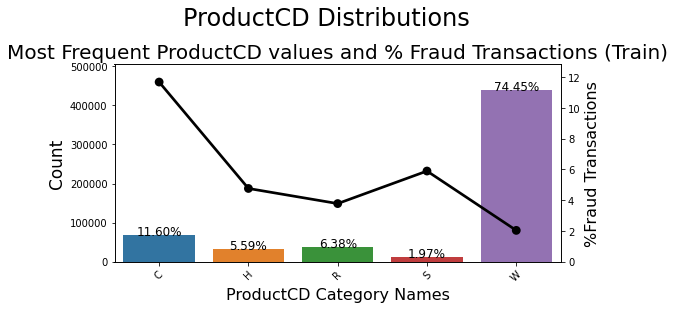

In [17]:
count_and_perc_fraud_plot(df_train,"ProductCD",size=(8,8),title=" (Train)")


### Card Variables

In [18]:
cards = columns_names('card',1,6)

In [19]:
df_train[cards].head()

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit


It seems that card1,card2,car3 and card5 are continuous while card4 and card6 are categorical

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


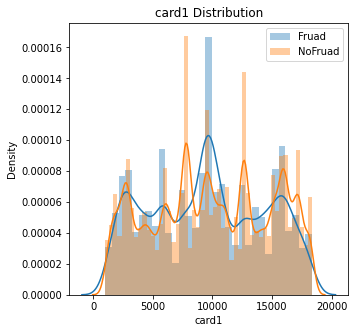

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


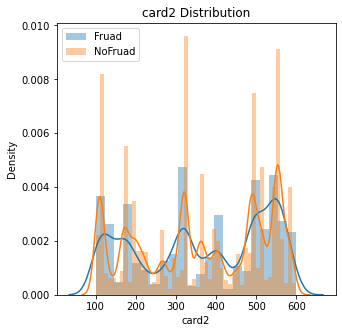

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


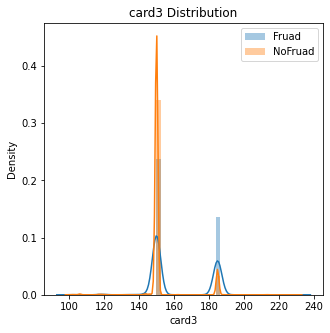

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


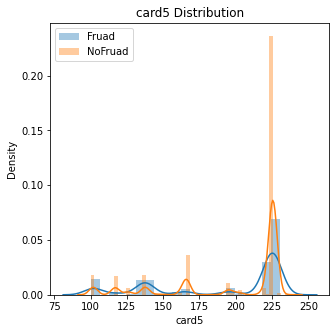

In [20]:
for card in ["card1","card2","card3","card5"]:
      distribution_plot(df_train,card,title="(TRAIN)")      

The values of card1 , acrd2 are evenly distributed but the values of card3 and card5 are concentrated to some values values only . We can convert them into  categorical features 

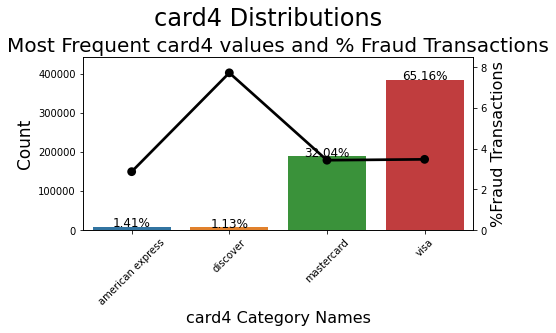

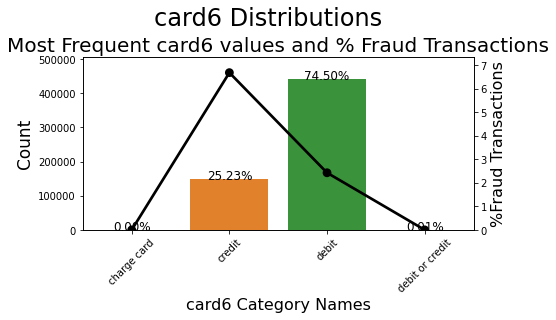

In [21]:
for i in ["card4","card6"]:
    count_and_perc_fraud_plot(df_train,i,size = (7,7))


### addr variables

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


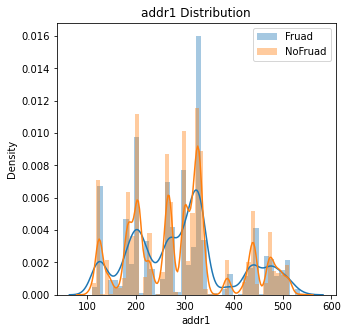

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


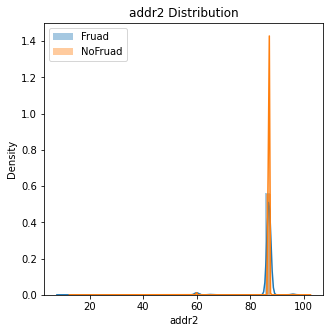

In [22]:
for i in ["addr1","addr2"]:
        distribution_plot(df_train,i)

### Dist Variables

In [23]:
dist = columns_names("dist",1,2)
df_train[dist].isnull().sum()
df_train[dist].describe(percentiles=[0.99,0.90,0.75,0.50,0.25,0.10])

,dist1,dist2
count,238269.000000,37627.000000
mean,118.502344,231.856273
std,371.874253,529.061542
min,0.000000,0.000000
10%,1.000000,1.000000
25%,3.000000,7.000000
50%,8.000000,37.000000
75%,24.000000,206.000000
90%,268.000000,634.400000
99%,2040.000000,2367.480000


There are lot of nan values in these columns 

These columns have a high standard deviation. One can see that that 99% percentage of the values lie under 2040 (dist1) but max value is 10286 , similar is the case with dist2

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


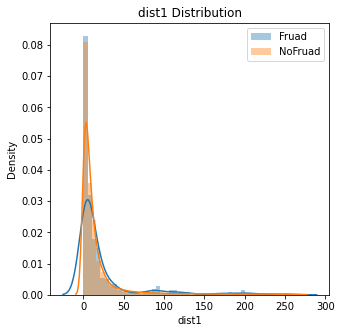

In [24]:
distribution_plot(df_train[df_train["dist1"]<=268],"dist1")

Dist 1 is higly skewed 

In [25]:
df_train["log_dst1"] = np.log1p(df_train["dist1"].fillna(0))
df_train["log_dst2"] = np.log1p(df_train["dist2"].fillna(0))

In [26]:
df_test["log_dst1"] = np.log1p(df_test["dist1"].fillna(0))
df_test["log_dst2"] = np.log1p(df_test["dist2"].fillna(0))

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


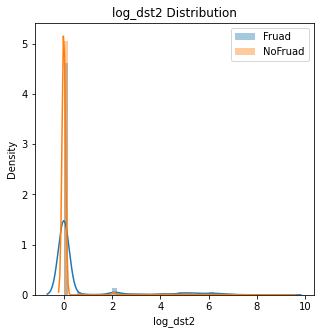

In [27]:
distribution_plot(df_train,"log_dst2")

#### D variables

In [28]:
D_vars = columns_names("D",1,15)
df_train[D_vars].isnull().sum()

D1       1269
D2     280797
D3     262878
D4     168922
D5     309841
D6     517353
D7     551623
D8     515614
D9     515614
D10     76022
D11    279287
D12    525823
D13    528588
D14    528353
D15     89113
dtype: int64

In [29]:
D_vars.append("trans_dt")

### D2

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='D9'>

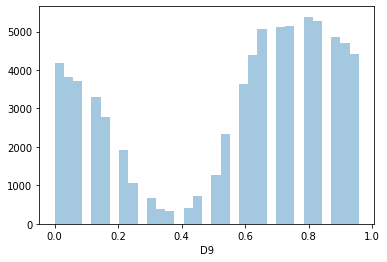

In [30]:
sns.distplot(df_train["D9"].dropna(),hist= True,kde = False)


## M variables


In [31]:
M_vars = columns_names("M",1,9)

In [32]:
df_train[M_vars].head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,T,T,T,M2,F,T,NaN,NaN,NaN
1,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,T,T,T,M0,F,F,F,F,F
3,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Except for M4 all the other variable values are in booleans 

In [33]:
def cat_plots(df,col,size):
    df[col].fillna("NA",inplace = True)
    fraud_perc = df.groupby(col)["isFraud"].value_counts(normalize = True).unstack().fillna(0)[1]
    
    plt.figure(figsize = size)
    
    g = sns.countplot(x = col,data = df,order = fraud_perc.index)
    g.set_title("{} Count".format(col),fontsize= 15)
    g.set_xlabel("{}".format(col),fontsize=15)
    g.set_ylabel("Count",fontsize=15)
    plt.xticks(rotation = "vertical")
    
    r = g.twinx()
    r = sns.pointplot(x = fraud_perc.index,y = fraud_perc,color = "blue")
    r.set_ylabel("Fraud Rate",fontsize = 16,color = "blue")
    
    
    

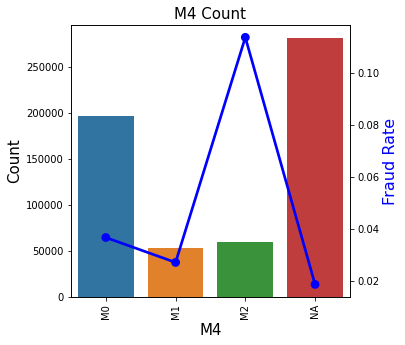

In [34]:
cat_plots(df_train,"M4",size = (5,5))

### Device_info

In [35]:
df_train["isFraud"] = df_train["isFraud"]

In [36]:
devices = df_train.groupby("DeviceInfo").filter(lambda x :  len(x) > 250)["DeviceInfo"].unique()

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


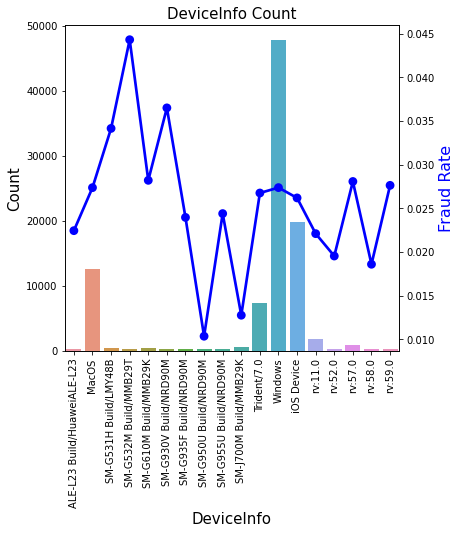

In [37]:
cat_plots(df = df_train[df_train["DeviceInfo"].isin(devices)],col = "DeviceInfo",size = (6,6))

#### V Variabables

In [38]:
V_vars = columns_names("V",1,339)

In [39]:
df_train[V_vars]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [41]:
def PCA_apply(df_train,df_test,cols,n_components,prefix = "PCA",rand_seed = 6):
    pca = PCA(n_components=n_components,random_state = rand_seed)
    principalComponents_train = pca.fit_transform(df_train[cols])
    principalComponents_test = pca.transform(df_test[cols])

    principalDF_train = pd.DataFrame(principalComponents_train)
    principalDF_test = pd.DataFrame(principalComponents_test)
    df_train.drop(cols,axis=1,inplace = True)
    df_test.drop(cols,axis=1,inplace = True)
    principalDF_train.rename(columns = lambda x :str(prefix) + str(x),inplace = True)
    principalDF_test.rename(columns = lambda x :str(prefix) + str(x),inplace = True)

    df_train = pd.concat([df_train,principalDF_train],axis = 1)
    df_test = pd.concat([df_test,principalDF_test],axis = 1)
    
    return df_train,df_test

In [42]:
V_cols = columns_names("V",1,339)

In [43]:
for col in V_vars:
    df_train[col] = df_train[col].fillna((df_train[col].min() - 2))
    df_test[col] = df_test[col].fillna((df_test[col].min() - 2))



In [44]:
min_max_scaler = MinMaxScaler()

df_train[V_cols] =  min_max_scaler.fit_transform(df_train[V_cols])
df_test[V_cols] =  min_max_scaler.transform(df_test[V_cols])

In [45]:
df_train,df_test = PCA_apply(df_train,df_test,V_cols,n_components =30,prefix = "PCA",rand_seed = 6)

In [46]:
list(df_train.columns)

['Unnamed: 0',
 'TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'id_01',
 'id_02',
 'id_03',
 'id_04',
 'id_05',
 'id_06',
 'id_07',
 'id_08',
 'id_09',
 'id_10',
 'id_11',
 'id_12',
 'id_13',
 'id_14',
 'id_15',
 'id_16',
 'id_17',
 'id_18',
 'id_19',
 'id_20',
 'id_21',
 'id_22',
 'id_23',
 'id_24',
 'id_25',
 'id_26',
 'id_27',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_32',
 'id_33',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38',
 'DeviceType',
 'DeviceInfo',
 'trans_dt',
 'Day_of_Week',
 'Hours',
 'Day_of_month',
 'TransactionAmt_log',
 '

# Emails

There seem to be alot of related emails 

In [47]:
emails = {'gmail': 'google', 'att.net': 'att', 'twc.com': 'spectrum',
'scranton.edu': 'other', 'optonline.net': 'other', 'hotmail.co.uk': 'microsoft', 'comcast.net': 'other', 'yahoo.com.mx': 'yahoo', 'yahoo.fr'
: 'yahoo', 'yahoo.es': 'yahoo', 'charter.net': 'spectrum', 'live.com':
'microsoft', 'aim.com': 'aol', 'hotmail.de': 'microsoft', 'centurylink.net': 'centurylink', 
'gmail.com': 'google', 'me.com': 'apple', 'earthlink.net': 'other', 'gmx.de': 'other', 
'web.de': 'other', 'cfl.rr.com': 'other', 'hotmail.com': 'microsoft', 'protonmail.com': 'other', 
'hotmail.fr': 'microsoft', 'windstream.net': 'other', 'outlook.es': 'microsoft', 
'yahoo.co.jp': 'yahoo', 'yahoo.de': 'yahoo', 'servicios-ta.com': 'other', 'netzero.net': 'other', 
'suddenlink.net': 'other', 'roadrunner.com': 'other', 'sc.rr.com': 'other', 'live.fr': 'microsoft', 
'verizon.net': 'yahoo', 'msn.com': 'microsoft', 'q.com': 'centurylink',
'prodigy.net.mx': 'att', 'frontier.com': 'yahoo', 'anonymous.com': 'other', 'rocketmail.com': 'yahoo', 
'sbcglobal.net': 'att', 'frontiernet.net': 'yahoo', 'ymail.com': 'yahoo', 'outlook.com': 'microsoft', 
'mail.com': 'other', 'bellsouth.net': 'other', 'embarqmail.com': 'centurylink', 
'cableone.net': 'other', 'hotmail.es': 'microsoft', 'mac.com':
'apple', 'yahoo.co.uk': 'yahoo', 'netzero.com': 'other', 'yahoo.com':
'yahoo', 'live.com.mx': 'microsoft', 'ptd.net': 'other', 'cox.net': 'other', 'aol.com': 'aol', 
'juno.com': 'other', 'icloud.com': 'apple'}
us_emails = ['gmail', 'net', 'edu']
for c in ['P_emaildomain', 'R_emaildomain']:
    df_train[c + '_bin'] = df_train[c].map(emails)
    df_test[c + '_bin'] = df_test[c].map(emails)
    df_train[c + '_suffix'] = df_train[c].map(lambda x: str(x).split('.')[-1])
    df_test[c + '_suffix'] = df_test[c].map(lambda x: str(x).split('.')[-1])
    df_train[c + '_suffix'] = df_train[c + '_suffix'].map(lambda x: x if str(x) not in us_emails else 'us')
    df_test[c + '_suffix'] = df_test[c + '_suffix'].map(lambda x: x if str(x) not in us_emails else 'us')

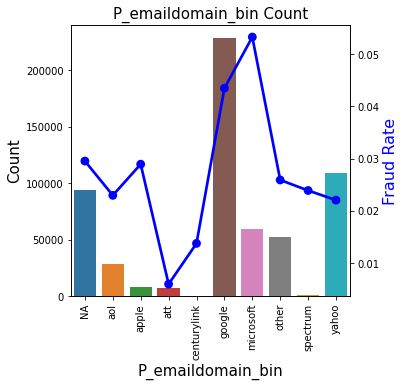

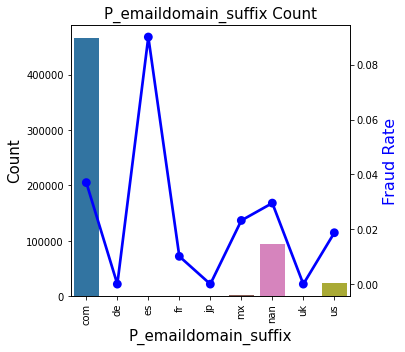

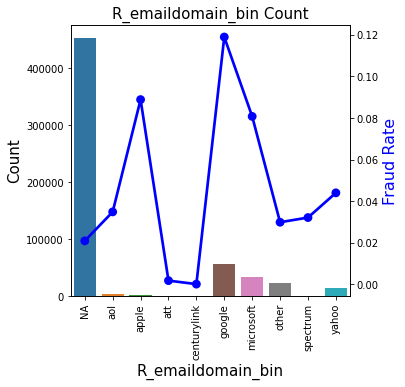

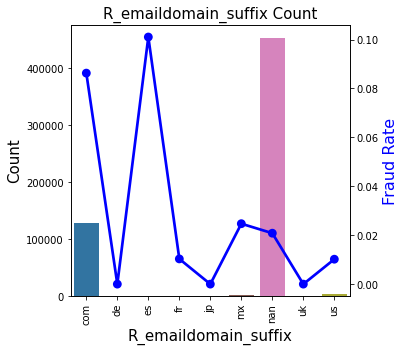

In [48]:
for i in ["P_emaildomain_bin","P_emaildomain_suffix","R_emaildomain_bin","R_emaildomain_suffix"]:
                    cat_plots(df_train,i,size=(5,5))


# Iden vars

In [49]:
def null_pers(df,col):
    null = df[col].isnull().sum()/len(df[col])*100
    uniq= df[col].nunique()
    return (col + " - null%: " + str(null) + " uniq: " + str(uniq))

            
   
   
    

In [50]:
id_num_vars = columns_names("id_0",1,9)
id_num_vars.extend(columns_names("id_",10,11))
id_cat = columns_names("id_",12,38)

There are alot of null values in id_vars. 

It is given that from id_12 to id_38 are categorica; colums 

In [51]:
df_train[id_cat]

,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,...,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38
0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,...,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T
1,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,...,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T
2,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,...,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T
3,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,...,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T
4,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,...,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the above table we can plot the columns which have few unique values

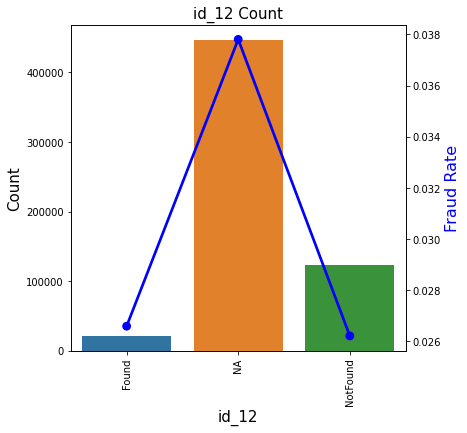

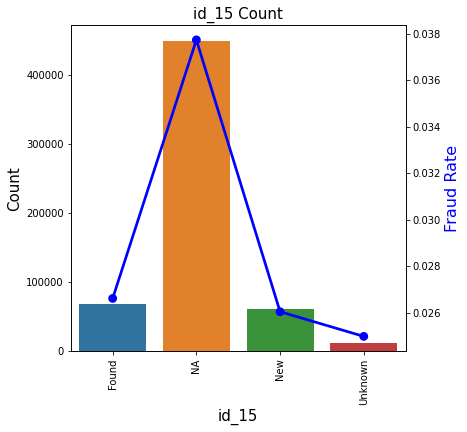

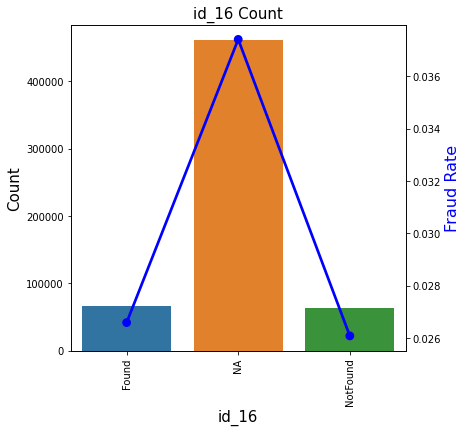

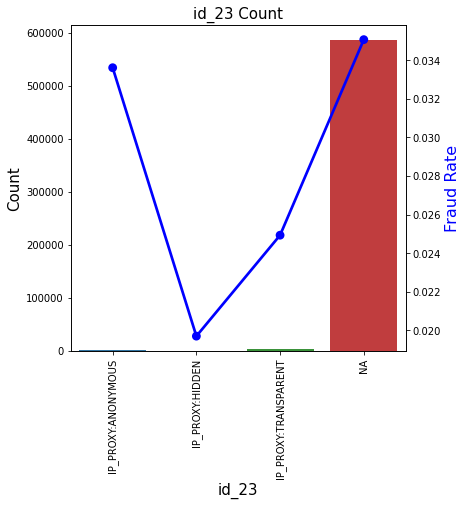

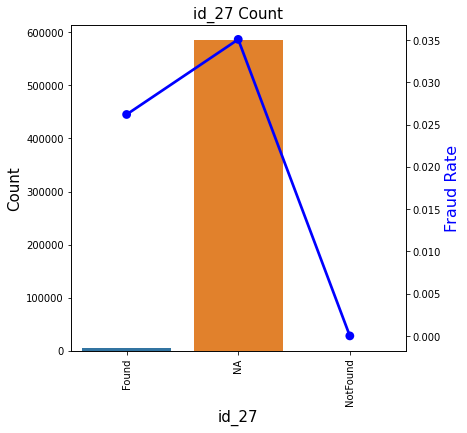

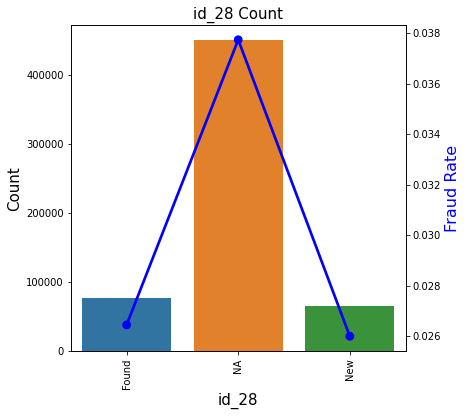

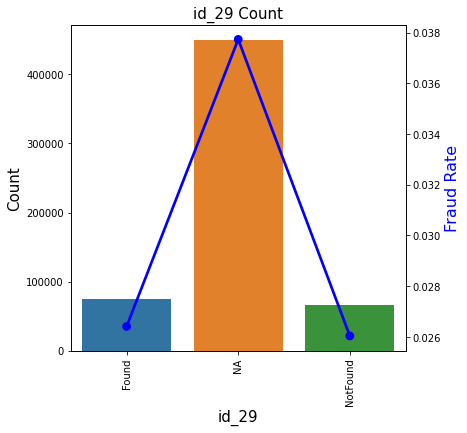

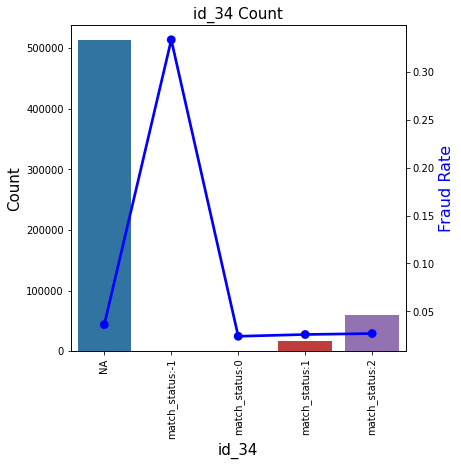

In [52]:
for col in ['id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29',"id_34"]:
    cat_plots(df_train,col,size=(6,6))

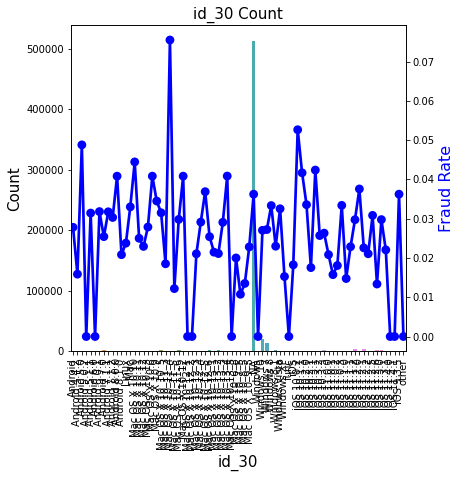

In [53]:
cat_plots(df_train,"id_30",size  = (6,6))

In [54]:
df_train.loc[df_train['id_30'].str.contains('Windows', na=False), 'id_30'] = 'Windows'
df_train.loc[df_train['id_30'].str.contains('iOS', na=False), 'id_30'] = 'iOS'
df_train.loc[df_train['id_30'].str.contains('Mac OS', na=False), 'id_30'] = 'Mac'
df_train.loc[df_train['id_30'].str.contains('Android', na=False), 'id_30'] = 'Android'
df_train['id_30'].fillna("NAN", inplace=True)

df_test.loc[df_test['id-30'].str.contains('Windows', na=False), 'id_30'] = 'Windows'
df_test.loc[df_test['id-30'].str.contains('iOS', na=False), 'id_30'] = 'iOS'
df_test.loc[df_test['id-30'].str.contains('Mac OS', na=False), 'id_30'] = 'Mac'
df_test.loc[df_test['id-30'].str.contains('Android', na=False), 'id_30'] = 'Android'
df_test['id-30'].fillna("NAN", inplace=True)

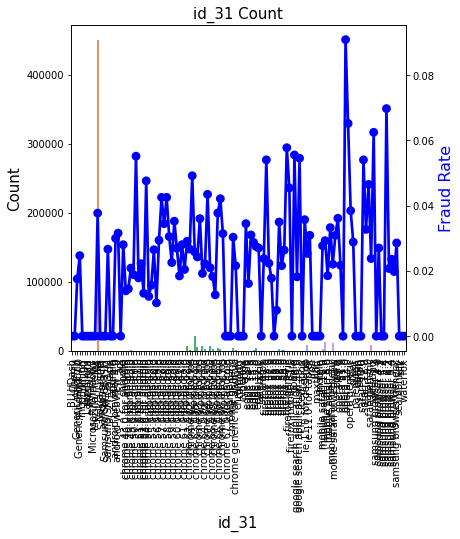

In [55]:
cat_plots(df_train,"id_31",size = (6,6))

## DEVICE INFO

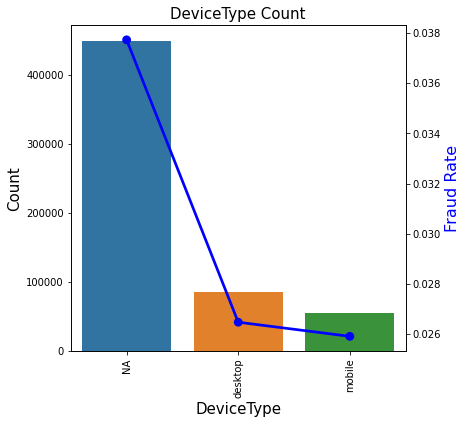

In [56]:
cat_plots(df_train,'DeviceType',size = (6,6))

## Preparing data for modeling

In [65]:
train_null_perc = df_train.isnull().sum()/df_train.shape[0]*100
missing_values= pd.DataFrame({"Variables":train_null_perc.index,"Percentage_of_missing_values":train_null_perc.values})
missing_values["Percentage_of_missing_values"].describe(percentiles= [0.25,0.30,0.35,0.40,0.45,0.50,0.75,0.99])

count    137.000000
mean      29.329799
std       38.468141
min        0.000000
25%        0.000000
30%        0.000000
35%        0.000000
40%        0.000000
45%        0.000000
50%        0.000000
75%       76.126088
99%       99.129563
max       99.196159
Name: Percentage_of_missing_values, dtype: float64

In [67]:
final_cols = missing_values[missing_values["Percentage_of_missing_values"]<29]["Variables"]
final_train_data = df_train[final_cols]
#final_test_data = test[final_cols.pop("isFraud")]

In [71]:
num_col =  final_train_data.select_dtypes(["int64","float"])
vals = []
for x in df_train.columns:
    vals.append(len(df_train[x].value_counts()))

In [73]:
vals_col= pd.DataFrame({"Cols":df_train.columns,"Vars":vals})

In [82]:
final_train_data = final_train_data.drop(["Unnamed: 0","TransactionID"],axis=1)

In [83]:
final_test_data = df_test[final_train_data.drop("isFraud",axis=1).columns]

In [88]:
final_train_data.isnull().sum()[final_train_data.isnull().sum()>0]

card2              8933
card3              1565
card4              1577
card5              4259
card6              1571
addr1             65706
addr2             65706
P_emaildomain     94456
D1                 1269
D4               168922
D10               76022
D15               89113
M6               169360
dtype: int64

In [89]:
final_test_data.isnull().sum()[final_test_data.isnull().sum()>0]

card2                  8654
card3                  3002
card4                  3086
card5                  4547
card6                  3007
addr1                 65609
addr2                 65609
P_emaildomain         69192
C1                        3
C2                        3
C3                        3
C4                        3
C5                        3
C6                        3
C7                        3
C8                        3
C9                        3
C10                       3
C11                       3
C12                       3
C13                    4748
C14                       3
D1                     6031
D4                    76851
D10                   12545
D15                   12069
M4                   237745
M6                   158939
id_12                364784
id_15                369714
id_16                380944
id_23                501629
id_27                501629
id_28                369913
id_29                369913
id_30               

## Let us impute variables

In [91]:
final_train_data.isnull().sum()[final_train_data.isnull().sum()>0].index

Index(['card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2',
       'P_emaildomain', 'D1', 'D4', 'D10', 'D15', 'M6'],
      dtype='object')

In [93]:
df_train[['card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2','P_emaildomain', 'D1', 'D4', 'D10', 'D15', 'M6']]

,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,D1,D4,D10,D15,M6
0,NaN,150.0,discover,142.0,credit,315.0,87.0,NaN,14.0,NaN,13.0,0.0,T
1,404.0,150.0,mastercard,102.0,credit,325.0,87.0,gmail.com,0.0,0.0,0.0,0.0,T
2,490.0,150.0,visa,166.0,debit,330.0,87.0,outlook.com,0.0,0.0,0.0,315.0,F
3,567.0,150.0,mastercard,117.0,debit,476.0,87.0,yahoo.com,112.0,94.0,84.0,111.0,F
4,514.0,150.0,mastercard,102.0,credit,420.0,87.0,gmail.com,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,NaN,150.0,visa,226.0,debit,272.0,87.0,NaN,29.0,NaN,56.0,56.0,F
590536,225.0,150.0,mastercard,224.0,debit,204.0,87.0,gmail.com,0.0,0.0,0.0,0.0,T
590537,595.0,150.0,mastercard,224.0,debit,231.0,87.0,gmail.com,0.0,0.0,0.0,0.0,T
590538,481.0,150.0,mastercard,224.0,debit,387.0,87.0,aol.com,22.0,22.0,22.0,22.0,T


In [129]:
df_train["card2"].describe()

count    581607.000000
mean        362.555488
std         157.793246
min         100.000000
25%         214.000000
50%         361.000000
75%         512.000000
max         600.000000
Name: card2, dtype: float64

In [95]:
crr= df_train.select_dtypes(["int64","float"])

In [100]:
correlation  = crr.corr()

In [123]:
correlation["D1"][correlation["D1"] >0.1]

C5          0.132000
C9          0.145333
C13         0.137216
D1          1.000000
D2          0.981311
D3          0.280423
D4          0.585714
D6          0.525691
D7          0.204924
D10         0.562145
D11         0.592629
D12         0.521104
D13         0.370195
D14         0.154799
D15         0.638957
log_dst1    0.132222
PCA7        0.181853
PCA12       0.130234
PCA18       0.137173
PCA19       0.133698
Name: D1, dtype: float64

In [ ]:
log_dst2    0.356181
PCA3        0.434799